In [1]:
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
import pandas as pd
import numpy as np
import math

# Esercizio 4

In [2]:
impianti = pd.read_csv('impianti.csv', sep = ';', decimal='.')
impianti

,Unnamed: 0.1,Unnamed: 0,IDENTIFICATIVO_IMPIANTO,GENERATORI_NUMERO,EDIFICIO_CATEGORIA,GENERATORE_POTENZA,GENERATORE_COMBUSTIBILE,GENERATORE_DATA_INST,RAPPORTO_DI_CONTROLLO_DATA,RAP_DI_CONTROLLO_ESITO,ISPEZIONE_DATA,ISPEZIONE_ESITO
0,4,4,2f0dc989c2291c7d3fa48f8208ec0ff89,3.0,E8,31.0,GAS NATURALE,2000,2015,Positivo,2019,Positivo
1,14,14,2eedc9b812095cad7f849fe228ec7ff89,1.0,E1,24.0,GAS NATURALE,2011,2018,Positivo,2007,Positivo
2,36,36,2f3d39bfc2094cbd5f34ffb2188c3ff89,1.0,E1,28.1,GAS NATURALE,2008,2018,Positivo,2015,Negativo
3,68,68,2f7a198812f96c0d6f340f72288c6ff89,1.0,E1,23.3,GAS NATURALE,1997,2018,Positivo,2013,Negativo
4,70,70,2f2d49f8d2995cad3f940f6258dc2ff89,1.0,E1,40.0,GASOLIO,2012,2017,Positivo,2016,Positivo
...,...,...,...,...,...,...,...,...,...,...,...,...
365770,3297930,3297930,2f4c297843b93c6dcfb4aff278cc1ff89,1.0,E1,23.0,GAS NATURALE,2004,2017,Positivo,2013,Positivo
365771,3297931,3297931,2f4cf9b982e95cbd1ff4af9258ac4ff89,1.0,E1,27.9,GAS NATURALE,2008,2017,Positivo,2016,Positivo
365772,3297933,3297933,2f8ca9cf12796c2d7fa4ff8218cc0ff89,1.0,E1,27.9,GAS NATURALE,2004,2017,Positivo,2016,Positivo
365773,3297939,3297939,2efd29e802995c6ddf349f62789c7ff89,1.0,E1,26.0,GAS NATURALE,2014,2018,Positivo,2009,Positivo


1. Quanti dati contiene il dataset?

In [3]:
len(impianti)

365775

2. GENERATORE_POTENZA è nominale, ordinale o scalare?

GENERATORE_POTENZA è un attributo quantitativo scalare

3. Quanti impianti sono stati installati prima del 1940?

In [4]:
len(impianti[impianti['GENERATORE_DATA_INST'] < 1940])

0

4. Memorizzate in selezione i casi in cui la potenza è tra 15 e 35 kw e il combustibile è gas naturale

In [5]:
selezione = impianti[(impianti['GENERATORE_POTENZA'] >= 15) & (impianti['GENERATORE_POTENZA'] <= 35) & (impianti['GENERATORE_COMBUSTIBILE'] == 'GAS NATURALE')]
selezione

,Unnamed: 0.1,Unnamed: 0,IDENTIFICATIVO_IMPIANTO,GENERATORI_NUMERO,EDIFICIO_CATEGORIA,GENERATORE_POTENZA,GENERATORE_COMBUSTIBILE,GENERATORE_DATA_INST,RAPPORTO_DI_CONTROLLO_DATA,RAP_DI_CONTROLLO_ESITO,ISPEZIONE_DATA,ISPEZIONE_ESITO
0,4,4,2f0dc989c2291c7d3fa48f8208ec0ff89,3.0,E8,31.0,GAS NATURALE,2000,2015,Positivo,2019,Positivo
1,14,14,2eedc9b812095cad7f849fe228ec7ff89,1.0,E1,24.0,GAS NATURALE,2011,2018,Positivo,2007,Positivo
2,36,36,2f3d39bfc2094cbd5f34ffb2188c3ff89,1.0,E1,28.1,GAS NATURALE,2008,2018,Positivo,2015,Negativo
3,68,68,2f7a198812f96c0d6f340f72288c6ff89,1.0,E1,23.3,GAS NATURALE,1997,2018,Positivo,2013,Negativo
6,74,74,2f4de969c3995c5d6f940fc288fc4ff89,1.0,E1,23.3,GAS NATURALE,2006,2018,Positivo,2008,Positivo
...,...,...,...,...,...,...,...,...,...,...,...,...
365770,3297930,3297930,2f4c297843b93c6dcfb4aff278cc1ff89,1.0,E1,23.0,GAS NATURALE,2004,2017,Positivo,2013,Positivo
365771,3297931,3297931,2f4cf9b982e95cbd1ff4af9258ac4ff89,1.0,E1,27.9,GAS NATURALE,2008,2017,Positivo,2016,Positivo
365772,3297933,3297933,2f8ca9cf12796c2d7fa4ff8218cc0ff89,1.0,E1,27.9,GAS NATURALE,2004,2017,Positivo,2016,Positivo
365773,3297939,3297939,2efd29e802995c6ddf349f62789c7ff89,1.0,E1,26.0,GAS NATURALE,2014,2018,Positivo,2009,Positivo


5. Quanto vale in selezione l'eterogeneità di GENERATORE_COMBUSTIBILE?

Visto che selezione contiene solo i casi in cui il combustibile è GAS NATURALE, l'eterogeneità sarà 0 perchè tutti i casi hanno lo stesso valore


6. In selezione quante sono le diverse categorie di edifici?

In [6]:
len(selezione.EDIFICIO_CATEGORIA.unique())

17

7. Moda di EDIFICIO_CATEGORIA in selezione

In [7]:
selezione.EDIFICIO_CATEGORIA.mode()

0    E1
Name: EDIFICIO_CATEGORIA, dtype: object

8. Quanti sono gli edifici di categoria E1 in selezione?

In [8]:
len(selezione[selezione['EDIFICIO_CATEGORIA'] == 'E1'])

185588

9. Percentuale di selezione del punto precedente (edifici E1)

In [9]:
print(f'{(len(selezione[selezione.EDIFICIO_CATEGORIA == "E1"])/len(selezione))*100}%')

62.41566949842269%


# Esercizio 4

Memorizzare in selezione gli impianti installati dopo il 2000 e prima del 2019

In [10]:
selezione = impianti[(impianti['GENERATORE_DATA_INST'] > 2000) & (impianti['GENERATORE_DATA_INST'] < 2019)]
selezione

,Unnamed: 0.1,Unnamed: 0,IDENTIFICATIVO_IMPIANTO,GENERATORI_NUMERO,EDIFICIO_CATEGORIA,GENERATORE_POTENZA,GENERATORE_COMBUSTIBILE,GENERATORE_DATA_INST,RAPPORTO_DI_CONTROLLO_DATA,RAP_DI_CONTROLLO_ESITO,ISPEZIONE_DATA,ISPEZIONE_ESITO
1,14,14,2eedc9b812095cad7f849fe228ec7ff89,1.0,E1,24.0,GAS NATURALE,2011,2018,Positivo,2007,Positivo
2,36,36,2f3d39bfc2094cbd5f34ffb2188c3ff89,1.0,E1,28.1,GAS NATURALE,2008,2018,Positivo,2015,Negativo
4,70,70,2f2d49f8d2995cad3f940f6258dc2ff89,1.0,E1,40.0,GASOLIO,2012,2017,Positivo,2016,Positivo
5,71,71,286ad9b9f5d95c5ddf34afb258fc3ff89,1.0,E1,62.0,GAS NATURALE,2006,2019,Positivo,2016,Positivo
6,74,74,2f4de969c3995c5d6f940fc288fc4ff89,1.0,E1,23.3,GAS NATURALE,2006,2018,Positivo,2008,Positivo
...,...,...,...,...,...,...,...,...,...,...,...,...
365770,3297930,3297930,2f4c297843b93c6dcfb4aff278cc1ff89,1.0,E1,23.0,GAS NATURALE,2004,2017,Positivo,2013,Positivo
365771,3297931,3297931,2f4cf9b982e95cbd1ff4af9258ac4ff89,1.0,E1,27.9,GAS NATURALE,2008,2017,Positivo,2016,Positivo
365772,3297933,3297933,2f8ca9cf12796c2d7fa4ff8218cc0ff89,1.0,E1,27.9,GAS NATURALE,2004,2017,Positivo,2016,Positivo
365773,3297939,3297939,2efd29e802995c6ddf349f62789c7ff89,1.0,E1,26.0,GAS NATURALE,2014,2018,Positivo,2009,Positivo


1. Grafico di GENERATORE_DATA_INST che permetta di dire che nelle varie date di installazione sono stati installati circa lo stesso numero di impianti

Essendo GENERATORE_DATA_INST un attributo di tipo quanttiativo discreto, la rappresentazione grafica più appropriata è un grafico a barre.

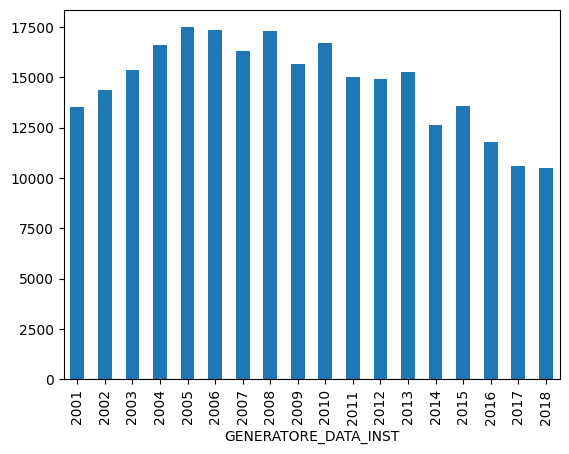

In [11]:
selezione.GENERATORE_DATA_INST.value_counts().sort_index().plot.bar()
plt.show()

Il grafico a barre mostra come le barre non siano della stessa altezza: la più alta è circa 17500 mentre la più bassa è circa 10000. Per cui l'ipotesi di partenza è da confutare.

2. Eterogeneità di GENERATORE_DATA_INST in questa selezione

In [12]:
def gini_index(series):
    s = len(series.unique())
    return (1-(sum(series.value_counts(normalize=True)**2)))*((s-1)/s)

print(gini_index(selezione.GENERATORE_DATA_INST))

0.8908562961053245


L'eterogeneità in questo caso è vicina ad 1 e quindi piuttosto alta

3. Tabella frequenze relative di ISPEZIONE_ESITO

In [13]:
isp_rel = pd.crosstab(selezione.ISPEZIONE_ESITO, columns=['Abs frequence'], colnames=[''], normalize=True)
isp_rel

,Abs frequence
ISPEZIONE_ESITO,
Negativo,0.236387
Positivo,0.763613


5. Percentuale impianti ispezionati con esito positivo

Guardando la tabella prodotta prima, si vede come circa il 76% degli esiti nella selezione è positivo

6. L'impianto del mio condominio è stato installato dopo il 2000 e non è ancora stato ispezionato. Qual'è la probabilità di esito positivo se esso viene ispezionato?

In [17]:
selezione.ISPEZIONE_ESITO.value_counts(normalize=True).mean()

0.5

7. Taglia del campione usata prima

In [18]:
len(selezione.ISPEZIONE_ESITO.dropna())

265070

8. Quale stimatore avete usato prima?

ISPEZIONE_ESITO ha solo due valori possibili: si può associare Positivo al valore 1 e Negativo al valore 0. Per cui ISPEZIONE_ESITO si può considerare come una bernoulliana di parametro p, il cui valore atteso coincide col parametro p.
Ho usato la media campionaria, che è sempre uno stimatore non distorto per il valore atteso della popolazione ed è sempre consistente in media quadratica.

9. Taglia minima del campione affinchè la probabilità di commettere un errore inferiore a 0.01 nella stima del valore atteso sia almeno 0.95

In [25]:
z = st.norm(0,1)
a = selezione.ISPEZIONE_ESITO.value_counts(normalize=True).var()/0.01**2

print(int(a*(z.ppf(1-(0.05/2)))**2))

5339


In [27]:
k = st.norm(13.4, 8.9)

k.cdf(13.4)

0.5